<a href="https://colab.research.google.com/github/jarbairn/masters_data_science/blob/main/Example_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science example

This project is an assignment for a taught MSc. It is based on the VAST 2015 challenge: https://ieeevis.org/year/2015/info/call-participation/vast-challenge

The exam questions were based on performing exploratory data analysis and the CRISP-DM pipeline.

The exam questions for movement data were to characterise the attendence at the park on the weekend. Describe up to five different groups at the park on this weekend:

1.   How big is the group type?
2.   Where does this type of group like to go in the park?
3.   How common is this type of group?
4.   What are your other observations about this type of group?
5.   What can you infer about the group?

Are there notable differences in the patterns of activity in the park across the three days?

For communications data: Identify those IDs that stand out for their large volumes of communication. For each of these IDs:

1.   Characterise the communication patterns you see.
2.   Based on these patterns, what do you hypothesise about these IDs?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def readCommunicationData(fname):
  comm = pd.read_csv(fname,dtype={"Timestamp": object, "from": np.uint32, "to": object, "location": object})
  #inital memory usage
  comm.info(memory_usage='deep')
  #convert the timestamp field to a timestamp object
  comm['Timestamp'] = pd.to_datetime(comm['Timestamp'],infer_datetime_format=True)
  #covert from field
  comm['from'] = comm['from'].astype('uint32')
  #change external references to 0
  comm['to'] = comm['to'].replace('external',0)
  comm['to'] = comm['to'].astype('uint32')
  #display new usage as reminder
  comm.info(memory_usage = 'deep')
  return comm



In [ ]:
comms_fri = readCommunicationData('/content/gdrive/My Drive/Challenge_Data/comm-data-Fri.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948739 entries, 0 to 948738
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  948739 non-null  object
 1   from       948739 non-null  uint32
 2   to         948739 non-null  object
 3   location   948739 non-null  object
dtypes: object(3), uint32(1)
memory usage: 190.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948739 entries, 0 to 948738
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  948739 non-null  datetime64[ns]
 1   from       948739 non-null  uint32        
 2   to         948739 non-null  uint32        
 3   location   948739 non-null  object        
dtypes: datetime64[ns](1), object(1), uint32(2)
memory usage: 75.8 MB


In [ ]:
comms_sat = readCommunicationData('/content/gdrive/My Drive/Challenge_Data/comm-data-Sat.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655866 entries, 0 to 1655865
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Timestamp  1655866 non-null  object
 1   from       1655866 non-null  uint32
 2   to         1655866 non-null  object
 3   location   1655866 non-null  object
dtypes: object(3), uint32(1)
memory usage: 331.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655866 entries, 0 to 1655865
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1655866 non-null  datetime64[ns]
 1   from       1655866 non-null  uint32        
 2   to         1655866 non-null  uint32        
 3   location   1655866 non-null  object        
dtypes: datetime64[ns](1), object(1), uint32(2)
memory usage: 131.8 MB


In [ ]:
comms_sun = readCommunicationData('/content/gdrive/My Drive/Challenge_Data/comm-data-Sun.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548724 entries, 0 to 1548723
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Timestamp  1548724 non-null  object
 1   from       1548724 non-null  uint32
 2   to         1548724 non-null  object
 3   location   1548724 non-null  object
dtypes: object(3), uint32(1)
memory usage: 310.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548724 entries, 0 to 1548723
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1548724 non-null  datetime64[ns]
 1   from       1548724 non-null  uint32        
 2   to         1548724 non-null  uint32        
 3   location   1548724 non-null  object        
dtypes: datetime64[ns](1), object(1), uint32(2)
memory usage: 123.5 MB


In [ ]:
def readMovementData(fname):
  move = pd.read_csv(fname)
  #remove any null values
  move = move[pd.notnull(move['id'])]
  #clear erronous data
  move = move[move['Timestamp'].str.len()==18]
  #display inital memory usage
  move.info(memory_usage='deep')
  #convert Timestamp into timestamp object
  move['Timestamp'] = pd.to_datetime(move['Timestamp'],infer_datetime_format=True,errors='ignore')
  #convert "from" field
  move['id'] = move['id'].astype('uint32')
  #convert type to category
  move['type'] = move['type'].astype('category')
  #convert positional values to int
  move['X'] = move['X'].astype('uint16')
  move['Y'] = move['Y'].astype('uint16')
  #display
  move.info(memory_usage='deep')
  return move


In [ ]:
mov_fri = readMovementData('/content/gdrive/My Drive/Challenge_Data/park-movement-Fri.csv')
mov_sat = readMovementData('/content/gdrive/My Drive/Challenge_Data/park-movement-Sat.csv')
mov_sun = readMovementData('/content/gdrive/My Drive/Challenge_Data/park-movement-Sun.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010914 entries, 0 to 6010913
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Timestamp  object
 1   id         int64 
 2   type       object
 3   X          int64 
 4   Y          int64 
dtypes: int64(3), object(2)
memory usage: 986.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010914 entries, 0 to 6010913
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   id         uint32        
 2   type       category      
 3   X          uint16        
 4   Y          uint16        
dtypes: category(1), datetime64[ns](1), uint16(2), uint32(1)
memory usage: 143.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078623 entries, 0 to 9078622
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Timestamp  object
 1   id         int64 
 2   type       object
 3   X          int64 
 4   Y       

<ipython-input-9-5ec67f690d56>:2: DtypeWarning: Columns (1,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  move = pd.read_csv(fname)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932424 entries, 0 to 10932424
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Timestamp  object
 1   id         object
 2   type       object
 3   X          object
 4   Y          object
dtypes: object(5)
memory usage: 2.6 GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932424 entries, 0 to 10932424
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   id         uint32        
 2   type       category      
 3   X          uint16        
 4   Y          uint16        
dtypes: category(1), datetime64[ns](1), uint16(2), uint32(1)
memory usage: 260.6 MB


## Communication Analysis

Now we have access to the data, we can perform frequency analysis to understand how many messages were sent, when they were sent, and where.

In [ ]:
#change objects to categories
comms_fri['from'] = pd.Categorical(comms_fri['from'])
comms_fri['to'] = pd.Categorical(comms_fri['to'])
comms_fri['location'] = pd.Categorical(comms_fri['location'])

comms_sat['from'] = pd.Categorical(comms_sat['from'])
comms_sat['to'] = pd.Categorical(comms_sat['to'])
comms_sat['location'] = pd.Categorical(comms_sat['location'])

comms_sun['from'] = pd.Categorical(comms_sun['from'])
comms_sun['to'] = pd.Categorical(comms_sun['to'])
comms_sun['location'] = pd.Categorical(comms_sun['location'])

In [ ]:
#check
comms_fri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948739 entries, 0 to 948738
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  948739 non-null  datetime64[ns]
 1   from       948739 non-null  category      
 2   to         948739 non-null  category      
 3   location   948739 non-null  category      
dtypes: category(3), datetime64[ns](1)
memory usage: 11.9 MB


We will now attempt to understand where most communications are sent from and to in the park over the weekend.

In [ ]:
#create new data frames with only the categorical variables
cat_comms_fri = comms_fri.select_dtypes(include=['category']).copy()
cat_comms_sat = comms_sat.select_dtypes(include=['category']).copy()
cat_comms_sun = comms_sun.select_dtypes(include=['category']).copy()

In [ ]:
#test
cat_comms_fri.head()

,from,to,location
0,439105,1053224,Kiddie Land
1,439105,1696241,Kiddie Land
2,439105,580064,Kiddie Land
3,439105,1464748,Kiddie Land
4,1836139,1593258,Entry Corridor


In [ ]:
#check for any missing or null values
print(cat_comms_fri.isnull().sum())
print(cat_comms_sat.isnull().sum())
print(cat_comms_sun.isnull().sum())

from        0
to          0
location    0
dtype: int64
from        0
to          0
location    0
dtype: int64
from        0
to          0
location    0
dtype: int64


In [ ]:
#usage of comms by location on Fri
comms_count_loc_fri = cat_comms_fri['location'].value_counts()
print(comms_count_loc_fri) #test to check selection has worked

Wet Land          353319
Entry Corridor    191229
Tundra Land       172764
Coaster Alley     117934
Kiddie Land       113493
Name: location, dtype: int64


In [ ]:
comms_count_loc_sat = cat_comms_sat['location'].value_counts()
comms_count_loc_sun = cat_comms_sun['location'].value_counts()

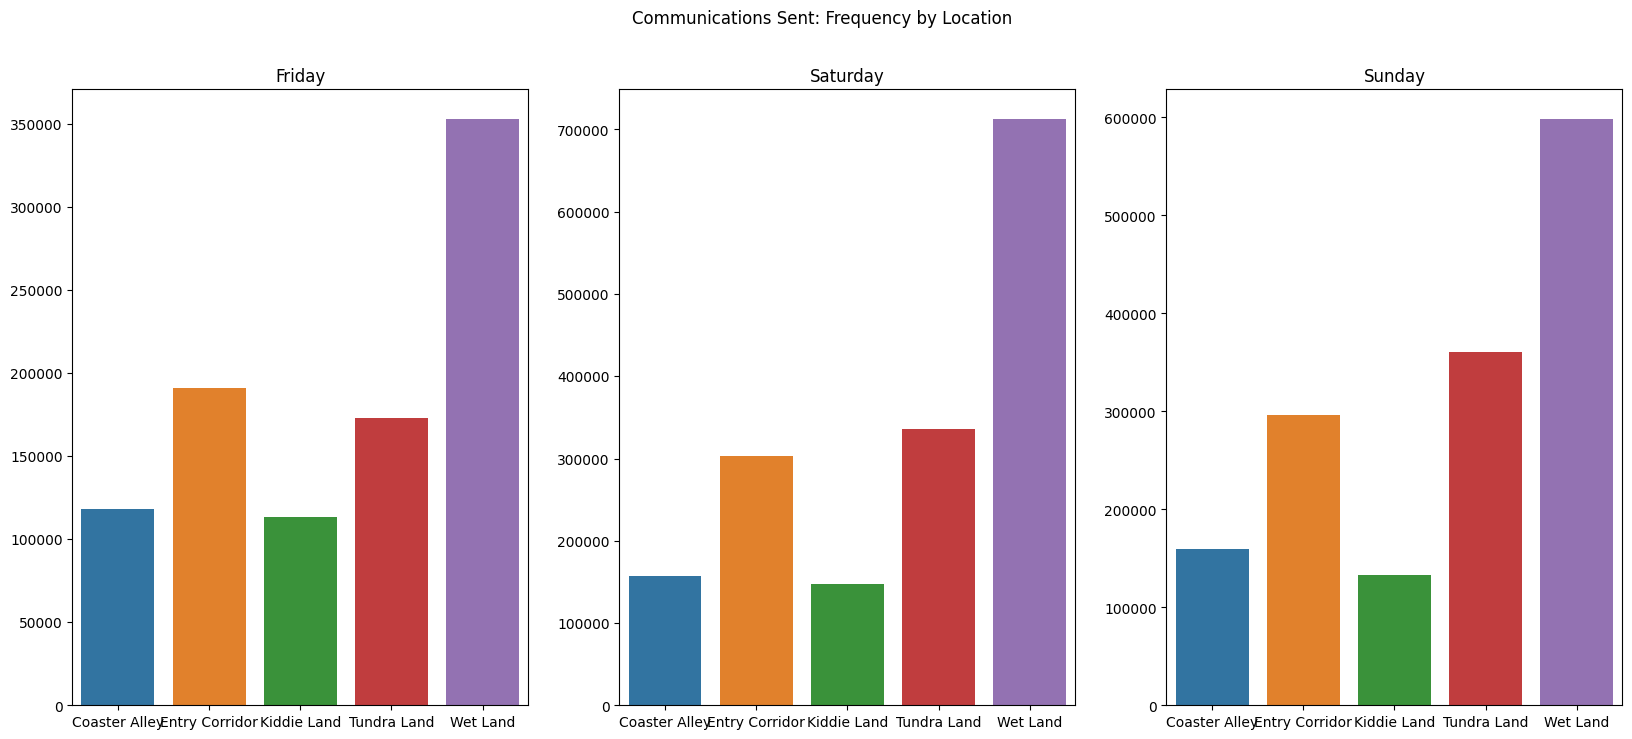

In [ ]:
fig, axes = plt.subplots(1,3, sharex=True,figsize=(20,8))
fig.suptitle('Communications Sent: Frequency by Location')

#Friday
axes[0].set_title('Friday')
sns.barplot(ax=axes[0],x=comms_count_loc_fri.index,y=comms_count_loc_fri.values)
#Saturday
axes[1].set_title('Saturday')
sns.barplot(ax=axes[1],x=comms_count_loc_sat.index,y=comms_count_loc_sat.values)
#Sunday
axes[2].set_title('Sunday')
sns.barplot(ax=axes[2],x=comms_count_loc_sun.index,y=comms_count_loc_sun.values)

plt.show()

We can see that across the weekend, Wet Land is the area associated with the most messaging. We can hypothesise that as Wet Land is the central area that views over the other areas, people may message to or from there to communicate with those waiting for them. More messages are sent overall on Saturday and Sunday.

### Communication by Volume

First, we will examine if messages were sent from outside the park in, then understand various parameters of usage.

In [ ]:
count_from_fri = cat_comms_fri['from'].value_counts()
count_to_fri = cat_comms_fri['to'].value_counts()
'external' in count_from_fri

False

In [ ]:
count_from_sat = cat_comms_sat['from'].value_counts()
count_to_sat = cat_comms_sat['to'].value_counts()
'external' in count_from_sat

False

In [ ]:
count_from_sun = cat_comms_sun['from'].value_counts()
count_to_sun = cat_comms_sun['to'].value_counts()
'external' in count_from_sun

False

We can see that no messages were sent from external ids to the park. We will now investigate usage per user, and if any anomalous users exist.

In [ ]:
count_from_fri.describe()

count     2950.000000
mean       321.606441
std        808.029483
min          1.000000
25%         26.000000
50%         92.000000
75%        520.750000
max      38658.000000
Name: from, dtype: float64

In [ ]:
count_from_sat.describe()

count     5297.000000
mean       312.604493
std       1037.203981
min          1.000000
25%         23.000000
50%         85.000000
75%        485.000000
max      70143.000000
Name: from, dtype: float64

In [ ]:
count_from_sun.describe()

count     6118.000000
mean       253.142203
std       1226.054952
min          1.000000
25%         23.000000
50%         76.000000
75%        332.000000
max      81559.000000
Name: from, dtype: float64

In [ ]:
count_from_fri.head()

1278894    38658
839736      5914
1508923     1896
825466      1850
970490      1686
Name: from, dtype: int64

In [ ]:
count_from_sat.head()

1278894    70143
839736     10224
1351786     2273
1374645     2008
524698      1870
Name: from, dtype: int64

In [ ]:
count_from_sun.head()

1278894    81559
839736     44674
620184      1979
19249       1977
170456      1813
Name: from, dtype: int64

In [ ]:
count_to_fri.head()

1278894    38540
0          11302
839736      5914
809736      1411
1812811     1356
Name: to, dtype: int64

In [ ]:
count_to_sat.head()

1278894    70001
0          21081
839736     10223
903262      1531
956264      1527
Name: to, dtype: int64

In [ ]:
count_to_sun.head()

1278894    81353
839736     44681
0          29694
1952914     1437
2007364     1409
Name: to, dtype: int64

We have found that two users (id 1278894 and 839736) sent an order of magnitude more messages than other users. We can hypothesise these ids are associated with the park management itself, and users message them more and receive messages from them more than to each other. We could further hypothesise given the huge number more messages for user id 1278894 that is is automated, possibly ride information. However, we do not have enough information to confirm that.

Extensive numbers of messages are sent to external numbers but none received.

Now we will look at when the most communications are sent in the park. We can see from initial exploratory data analysis more messages are sent on Saturday and Sunday than Friday, implying the park is busier then.

In [ ]:
count_from_2_fri = cat_comms_fri.groupby(['from']).size()
count_from_2_fri = count_from_2_fri.reset_index(name='count')
count_to_2_fri = cat_comms_fri.groupby(['to']).size()
count_to_2_fri = count_to_2_fri.reset_index(name='count')

In [ ]:
count_from_2_sat = cat_comms_sat.groupby(['from']).size()
count_from_2_sat = count_from_2_sat.reset_index(name='count')
count_to_2_sat = cat_comms_sat.groupby(['to']).size()
count_to_2_sat = count_to_2_sat.reset_index(name='count')

count_from_2_sun = cat_comms_sun.groupby(['from']).size()
count_from_2_sun = count_from_2_sun.reset_index(name='count')
count_to_2_sun = cat_comms_sun.groupby(['to']).size()
count_to_2_sun = count_to_2_sun.reset_index(name='count')

In [ ]:
mean_comms_fri = count_from_2_fri['count'].mean()
med_comms_fri = count_from_2_fri['count'].median()
mode_comms_fri = count_from_2_fri['count'].mode()
min_comms_fri = count_from_2_fri['count'].min()
print('Friday statistics: Mean:', mean_comms_fri, 'Median:',med_comms_fri,'Mode:',mode_comms_fri,'Minimum:',min_comms_fri)

Friday statistics: Mean: 321.6064406779661 Median: 92.0 Mode: 0    17
Name: count, dtype: int64 Minimum: 1


In [ ]:
mean_comms_sat = count_from_2_sat['count'].mean()
med_comms_sat = count_from_2_sat['count'].median()
mode_comms_sat = count_from_2_sat['count'].mode()
min_comms_sat = count_from_2_sat['count'].min()
print('Saturday statistics: Mean:', mean_comms_sat, 'Median:',med_comms_sat,'Mode:',mode_comms_sat,'Minimum:',min_comms_sat)

Saturday statistics: Mean: 312.60449310930716 Median: 85.0 Mode: 0    16
Name: count, dtype: int64 Minimum: 1


In [ ]:
mean_comms_sun = count_from_2_sun['count'].mean()
med_comms_sun = count_from_2_sun['count'].median()
mode_comms_sun = count_from_2_sun['count'].mode()
min_comms_sun = count_from_2_sun['count'].min()
print('Sunday statistics: Mean:', mean_comms_fri, 'Median:',med_comms_fri,'Mode:',mode_comms_fri,'Minimum:',min_comms_fri)

Sunday statistics: Mean: 321.6064406779661 Median: 92.0 Mode: 0    17
Name: count, dtype: int64 Minimum: 1


The average number of messages sent each day is approximately 320; however, given the data includes single users sending extensively more messages than average this is potentially not a useful metric. The highest number of messages are sent from 2 users and in the tens of thousands. The median values tend to be between 80-90; a better metric but given the range likely skewed by the very high maximum users. The modal value of messages sent is 17. This may be a more useful metric and reflect the park usage better.

### Communication by Time

In [ ]:
count_time = comms_fri.groupby(['Timestamp']).size()
count_time = count_time.reset_index(name='count')
print(count_time)

                Timestamp  count
0     2014-06-06 08:03:19      4
1     2014-06-06 08:03:47      1
2     2014-06-06 08:04:06      4
3     2014-06-06 08:04:22      4
4     2014-06-06 08:04:33      4
...                   ...    ...
46884 2014-06-06 23:22:28      1
46885 2014-06-06 23:22:59      1
46886 2014-06-06 23:23:22      1
46887 2014-06-06 23:25:05      1
46888 2014-06-06 23:25:54     14

[46889 rows x 2 columns]


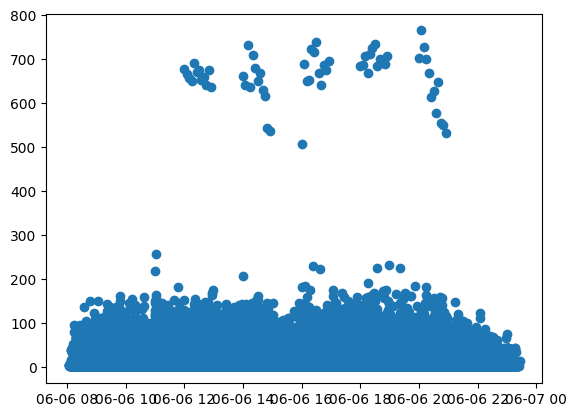

In [ ]:
plt.scatter(count_time['Timestamp'],count_time['count'])
plt.show()

Initial plotting of communications data agains time shows spikes in communications traffic between midday and 1800, potentially correlating to when the park is busiest. However, this may be being skewed by the large amounts of traffic from the park itself. We will attempt to drop the most common and potentially automated user ids to understand further.

In [ ]:
comms_fri_sort = comms_fri[comms_fri['from']!=839736]
comms_fri_sort = comms_fri[comms_fri['from']!=1278894]

In [ ]:
count_time_2 = comms_fri_sort.groupby(['Timestamp']).size()
count_time_2 = count_time_2.reset_index(name='count')
count_time_2.head()

,Timestamp,count
0,2014-06-06 08:03:19,4
1,2014-06-06 08:03:47,1
2,2014-06-06 08:04:06,4
3,2014-06-06 08:04:22,4
4,2014-06-06 08:04:33,4


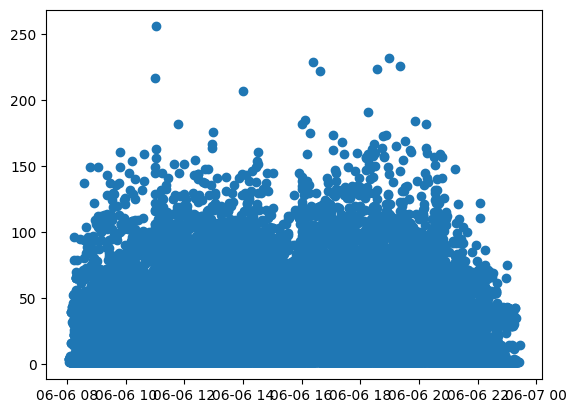

In [ ]:
plt.scatter(count_time_2['Timestamp'],count_time_2['count'])
plt.show()

This gives us a clearer picture but not a useful one. We shall group by hour to determine any overall patterns across the day.

In [ ]:
comms_fri['Timestamp'] = pd.to_datetime(comms_fri['Timestamp'].dt.round('H'))
comms_sat['Timestamp'] = pd.to_datetime(comms_sat['Timestamp'], infer_datetime_format=True)
comms_sat['Timestamp'] = pd.to_datetime(comms_sat['Timestamp'].dt.round('H'))
comms_sun['Timestamp'] = pd.to_datetime(comms_sun['Timestamp'], infer_datetime_format=True)
comms_sun['Timestamp'] = pd.to_datetime(comms_sun['Timestamp'].dt.round('H'))

In [ ]:
comms_fri_sort_2 = comms_fri[comms_fri['from']!= 1278894 & 839736]
count_time_fri = comms_fri_sort_2.groupby(['Timestamp']).size()
count_time_fri = count_time_fri.reset_index(name='count')

comms_sat_sort_2 = comms_sat[comms_sat['from']!= 1278894 & 839736]
count_time_sat = comms_sat_sort_2.groupby(['Timestamp']).size()
count_time_sat = count_time_sat.reset_index(name='count')

comms_sun_sort_2 = comms_sun[comms_sun['from']!= 1278894 & 839736]
count_time_sun = comms_sun_sort_2.groupby(['Timestamp']).size()
count_time_sun = count_time_sun.reset_index(name='count')

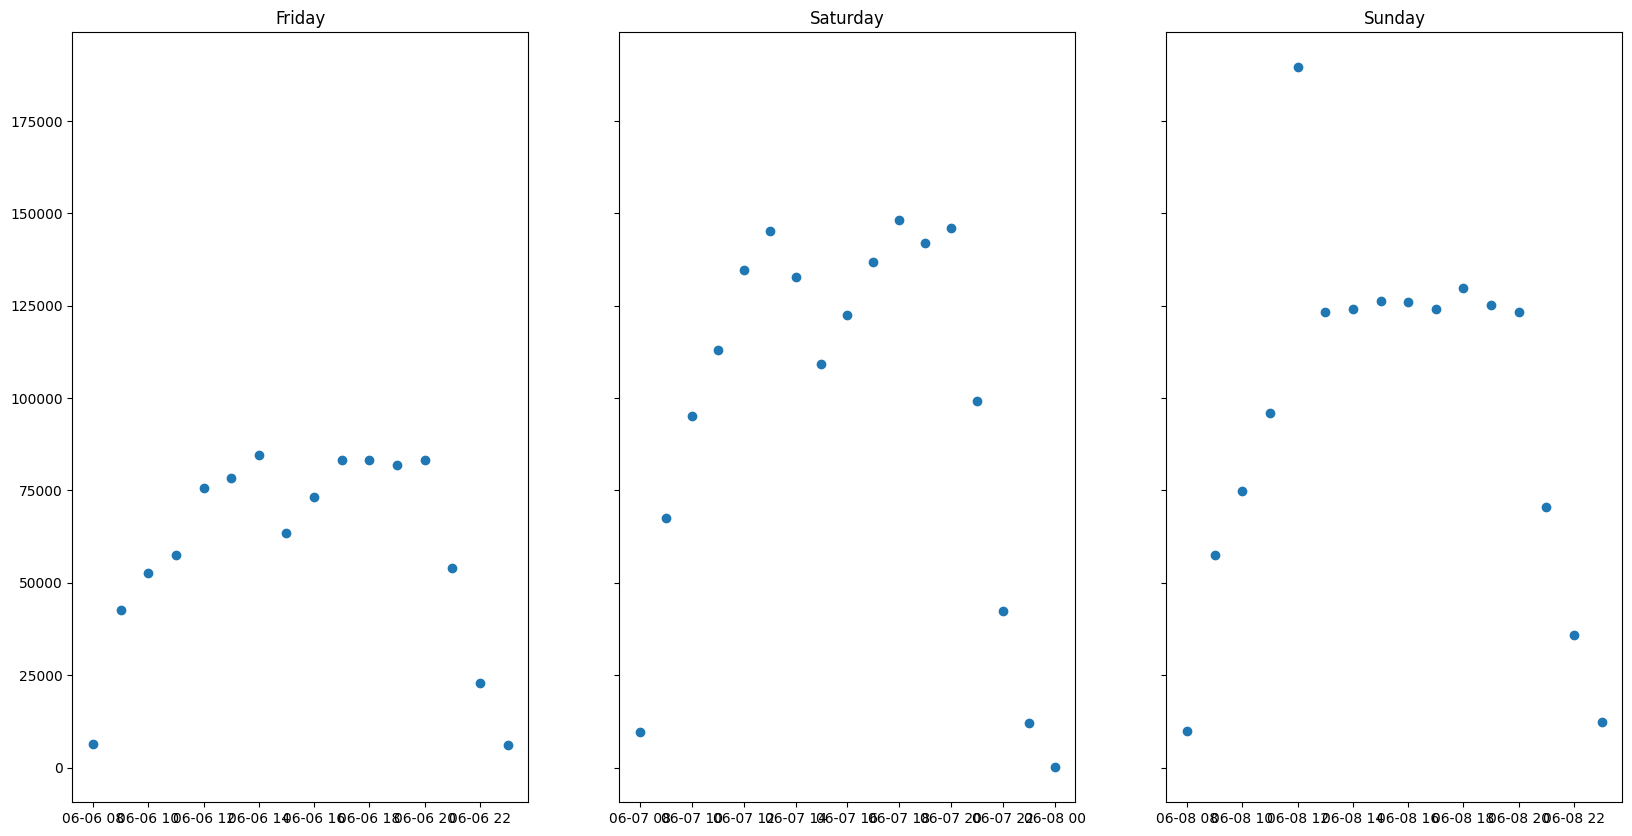

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True,figsize=(20,10))
ax1.scatter(count_time_fri['Timestamp'],count_time_fri['count'])
ax1.set_title('Friday')
ax2.scatter(count_time_sat['Timestamp'],count_time_sat['count'])
ax2.set_title('Saturday')
ax3.scatter(count_time_sun['Timestamp'],count_time_sun['count'])
ax3.set_title('Sunday')
plt.show()

## Communication analysis: Summary

Wet Land is the area assoicated with the most communication. The majority of park users only send a few messages, with a few sending a lot and one user, likely the park team, sending several orders of magnitude more messages. Messaging is most frequent during the day, with usage rising in the morning and falling in the evening.

# Movement Analysis

First, we will begin with some exploratory data analysis to understand the movement data on Friday:

In [ ]:
mov_sun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932424 entries, 0 to 10932424
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  datetime64[ns]
 1   id         uint32        
 2   type       category      
 3   X          uint16        
 4   Y          uint16        
dtypes: category(1), datetime64[ns](1), uint16(2), uint32(1)
memory usage: 260.6 MB


First, we will take a macroscopic look at the park to understand the most popular areas:

In [ ]:
mov_fri['id'] = pd.Categorical(mov_fri['id'])

In [ ]:
mov_sat['id'] = pd.Categorical(mov_sat['id'])

In [ ]:
print(mov_sun.isnull().sum())

Timestamp    0
id           0
type         0
X            0
Y            0
dtype: int64


In [ ]:
mov_sun['id'] = pd.Categorical(mov_sun['id'])

In [ ]:
check_ins_fri = mov_fri.loc[mov_fri.type == 'check-in']
check_ins_fri.reset_index()
check_ins_fri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82462 entries, 0 to 5991510
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  82462 non-null  datetime64[ns]
 1   id         82462 non-null  category      
 2   type       82462 non-null  category      
 3   X          82462 non-null  uint16        
 4   Y          82462 non-null  uint16        
dtypes: category(2), datetime64[ns](1), uint16(2)
memory usage: 2.0 MB


In [ ]:
check_ins_sat = mov_sat.loc[mov_sat.type == 'check-in']
check_ins_sat.reset_index()

,index,Timestamp,id,type,X,Y
0,0,2014-06-07 08:00:08,1102394,check-in,99,77
1,1,2014-06-07 08:00:08,1187304,check-in,63,99
2,2,2014-06-07 08:00:08,1363700,check-in,99,77
3,3,2014-06-07 08:00:10,1449032,check-in,63,99
4,4,2014-06-07 08:00:10,279658,check-in,63,99
...,...,...,...,...,...,...
115713,9044493,2014-06-07 23:04:36,90727,check-in,42,37
115714,9044495,2014-06-07 23:04:37,878118,check-in,42,37
115715,9044496,2014-06-07 23:04:38,2044279,check-in,60,37
115716,9044497,2014-06-07 23:04:39,1933890,check-in,60,37


In [ ]:
check_ins_sun = mov_sun.loc[mov_sun.type == 'check-in']
check_ins_sun.reset_index()

,index,Timestamp,id,type,X,Y
0,0,2014-06-08 08:00:11,1923259,check-in,0,67
1,1,2014-06-08 08:00:11,39012,check-in,0,67
2,2,2014-06-08 08:00:11,613364,check-in,0,67
3,3,2014-06-08 08:00:14,100951,check-in,99,77
4,4,2014-06-08 08:00:14,1959069,check-in,99,77
...,...,...,...,...,...,...
130653,10887057,2014-06-08 22:56:42,1473321,check-in,78,37
130654,10887058,2014-06-08 22:56:42,1476464,check-in,78,37
130655,10893738,2014-06-08 23:04:14,34522,check-in,47,11
130656,10893739,2014-06-08 23:04:15,1240892,check-in,47,11


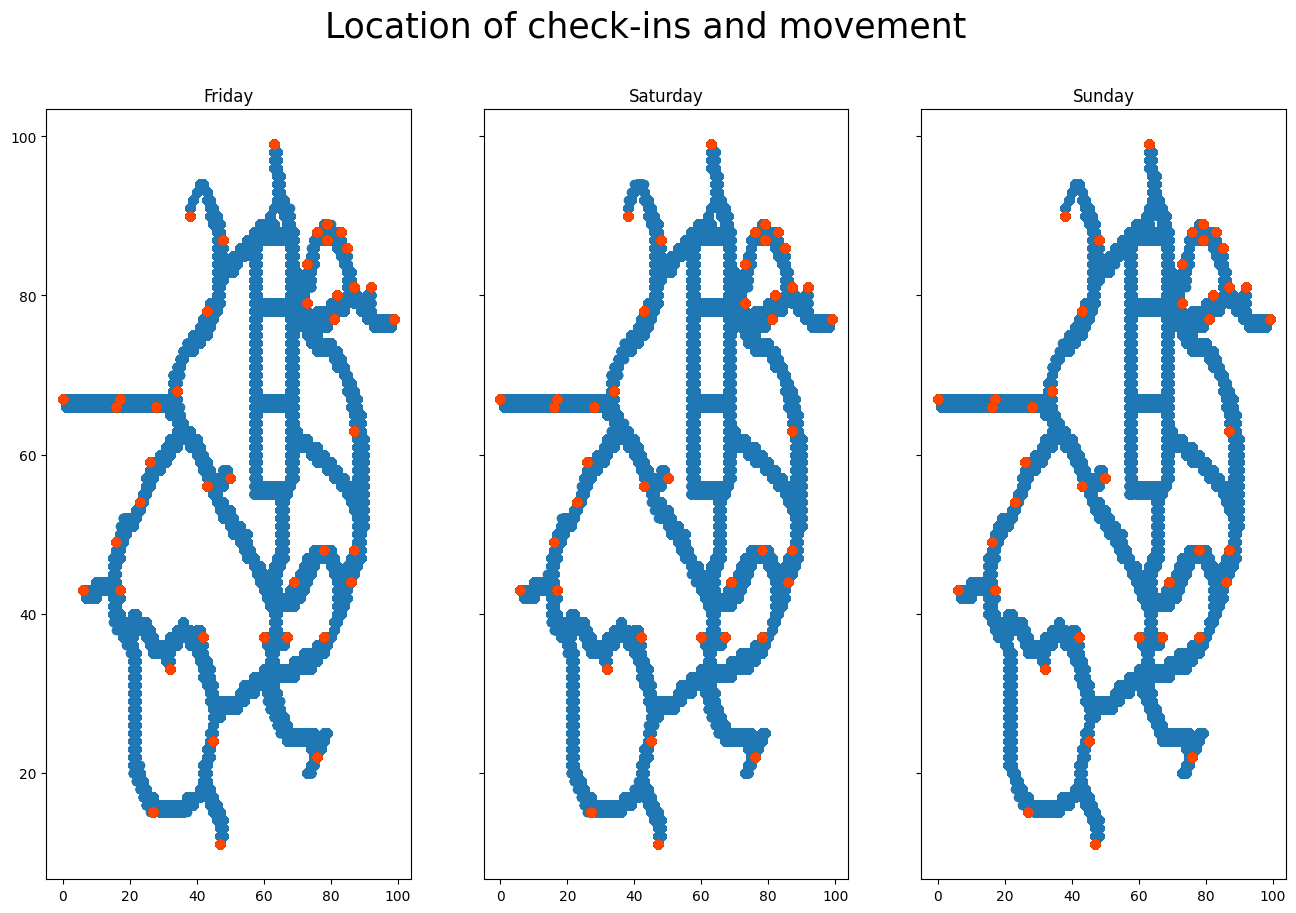

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(16,10))
fig.suptitle('Location of check-ins and movement',fontsize=25)

axes[0].scatter(mov_fri['X'],mov_fri['Y'])
axes[0].scatter(check_ins_fri['X'],check_ins_fri['Y'],color='orangered')
axes[0].set_title('Friday')

axes[1].scatter(mov_sat['X'],mov_sat['Y'])
axes[1].scatter(check_ins_sat['X'],check_ins_sat['Y'],color='orangered')
axes[1].set_title('Saturday')

axes[2].scatter(mov_sun['X'],mov_sun['Y'])
axes[2].scatter(check_ins_sun['X'],check_ins_sun['Y'],color='orangered')
axes[2].set_title('Sunday')
plt.show()

The above simply mirrors the pathway as expected, and shows us where check-ins occur. We will need to examine further to understand where the most popular rides are and understand different groups of people.

Let us characterise groups by the frequency of check-ins.

In [ ]:
counts_checkins_fri = mov_fri.groupby(['type'])['id'].size()
print(counts_checkins_fri)

counts_checkins_sat = mov_sat.groupby(['type'])['id'].size()
print(counts_checkins_sat)

counts_checkins_sun = mov_sun.groupby(['type'])['id'].size()
print(counts_checkins_sun)

type
check-in      82462
movement    5928452
Name: id, dtype: int64
type
check-in     115718
movement    8962905
Name: id, dtype: int64
type
check-in      130658
movement    10801766
Name: id, dtype: int64


In [ ]:
df_temp_fri = mov_fri['type'] == 'check-in'
df_checkins_fri = mov_fri[df_temp_fri].copy()
df_checkins_fri.head()

,Timestamp,id,type,X,Y
0,2014-06-06 08:00:16,1591741,check-in,63,99
1,2014-06-06 08:00:16,825652,check-in,63,99
2,2014-06-06 08:00:19,179386,check-in,63,99
3,2014-06-06 08:00:19,531348,check-in,63,99
4,2014-06-06 08:00:31,1483004,check-in,0,67


In [ ]:
df_temp_sat = mov_sat['type'] == 'check-in'
df_checkins_sat = mov_sat[df_temp_sat].copy()

df_temp_sun = mov_sun['type'] == 'check-in'
df_checkins_sun = mov_sun[df_temp_sun].copy()

In [ ]:
checkin_groups_fri = df_checkins_fri.groupby(['id']).size()
checkin_groups_fri = checkin_groups_fri.reset_index(name='count')

checkin_groups_sat = df_checkins_sat.groupby(['id']).size()
checkin_groups_sat = checkin_groups_sat.reset_index(name='count')

checkin_groups_sun = df_checkins_sun.groupby(['id']).size()
checkin_groups_sun = checkin_groups_sun.reset_index(name='count')

In [ ]:
mean_checkin_fri = checkin_groups_fri['count'].mean()
med_checkin_fri = checkin_groups_fri['count'].median()
max_checkin_fri = checkin_groups_fri['count'].max()
min_checkin_fri = checkin_groups_fri['count'].min()
std_checkin_fri = checkin_groups_fri['count'].std()
print(mean_checkin_fri,med_checkin_fri,max_checkin_fri,min_checkin_fri,std_checkin_fri)

23.183019398369414 22.0 61 1 9.635305088787305


In [ ]:
mean_checkin_sat = checkin_groups_sat['count'].mean()
med_checkin_sat = checkin_groups_sat['count'].median()
max_checkin_sat = checkin_groups_sat['count'].max()
min_checkin_sat = checkin_groups_sat['count'].min()
std_checkin_sat = checkin_groups_sat['count'].std()
print(mean_checkin_sat,med_checkin_sat,max_checkin_sat,min_checkin_sat,std_checkin_sat)

18.049914209951645 17.0 43 0 6.23537324286352


In [ ]:
mean_checkin_sun = checkin_groups_sun['count'].mean()
med_checkin_sun = checkin_groups_sun['count'].median()
max_checkin_sun = checkin_groups_sun['count'].max()
min_checkin_sun = checkin_groups_sun['count'].min()
std_checkin_sun = checkin_groups_sun['count'].std()
print(mean_checkin_sun,med_checkin_sun,max_checkin_sun,min_checkin_sun,std_checkin_sun)

17.262253930506013 17.0 41 1 5.897674250768232


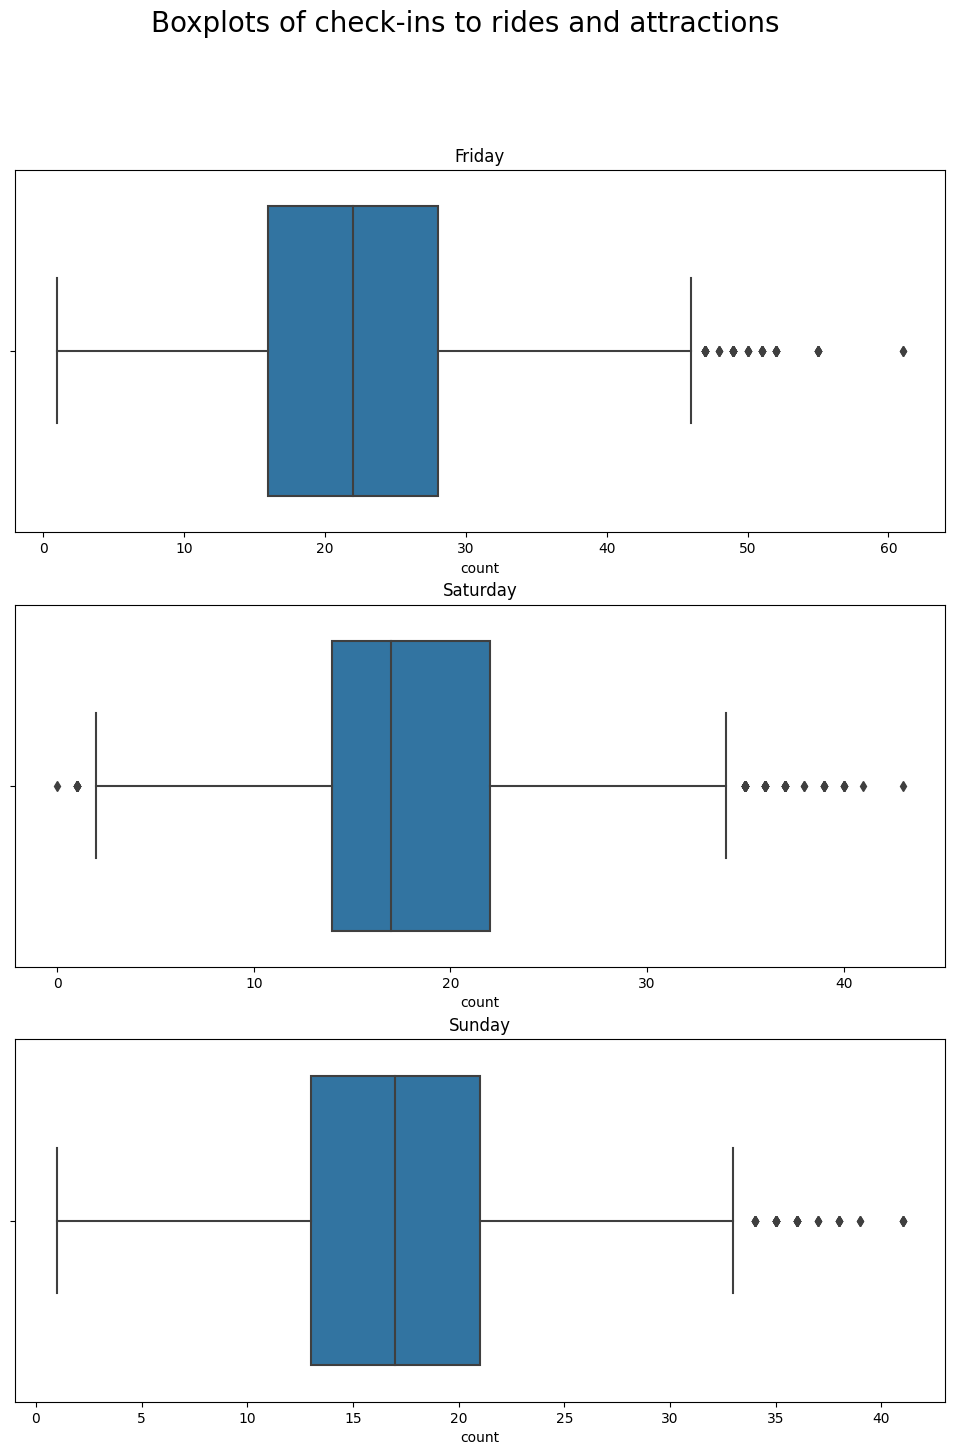

In [ ]:
fig, axes = plt.subplots(3, figsize=(12,16),sharex=False, sharey=True)
fig.suptitle('Boxplots of check-ins to rides and attractions',fontsize=20)

sns.boxplot(x=checkin_groups_fri['count'],ax=axes[0])
axes[0].set_title('Friday')
sns.boxplot(x=checkin_groups_sat['count'],ax=axes[1])
axes[1].set_title('Saturday')
sns.boxplot(x=checkin_groups_sun['count'],ax=axes[2])
axes[2].set_title('Sunday')
plt.show()

This shows us how park usage varies during the weekend. Friday has the highest maximum usage, whereas Saturday and Sunday both have some groups not or rarely checking into rides or attractions at all. Overall, wide variation of usage is seen on all days. Some groups will use a lot of rides/attractions, some fewer, and in some cases none at all. We will examine further by groups which use rides, and see which rides they prefer.

We will characterise four groups:

1. A group who checks into rides the least;
2. A group who checks into rides around the average amount;
3. A group who checks into the rides a large number of times;
4. A group who checks into rides the most, up to the maximum allowed.

We will then examine their movement activity to try and understand their preferences.

In [ ]:
#get ids that check in between 1 and 15 times, based on approximate group stats

count_temp_lower_fri = (checkin_groups_fri['count'] >= min_checkin_fri) & (checkin_groups_fri['count'] < mean_checkin_fri)
#get median-average group between 16 and 29
count_temp_mid_fri = (checkin_groups_fri['count'] >= 10) & (checkin_groups_fri['count'] < 30)
#get average-high group between 30 and 44
count_temp_high_fri = (checkin_groups_fri['count'] >= 30) & (checkin_groups_fri['count'] < 45)
#get maximum group
count_temp_max_fri = (checkin_groups_fri['count'] >= 45) & (checkin_groups_fri['count'] < max_checkin_fri)

In [ ]:
count_temp_lower_sat = (checkin_groups_sat['count'] >= min_checkin_sat) & (checkin_groups_sat['count'] < mean_checkin_sat)
#get median-average group between 16 and 29
count_temp_mid_sat = (checkin_groups_sat['count'] <= mean_checkin_sat) & (checkin_groups_sat['count'] < mean_checkin_sat - std_checkin_sat)
#get average-high group between 30 and 44
count_temp_high_sat = (checkin_groups_sat['count'] >= mean_checkin_sat) & (checkin_groups_sat['count'] < (mean_checkin_sat + std_checkin_sat))
#get maximum group
count_temp_max_sat = (checkin_groups_sat['count'] >= (mean_checkin_sat + std_checkin_sat)) & (checkin_groups_sat['count'] < max_checkin_sat)

In [ ]:
count_temp_lower_sun = (checkin_groups_sun['count'] >= min_checkin_sun) & (checkin_groups_sun['count'] < mean_checkin_sun)
#get median-average group between 16 and 29
count_temp_mid_sun = (checkin_groups_sun['count'] <= mean_checkin_sun) & (checkin_groups_sun['count'] < mean_checkin_sun - std_checkin_sun)
#get average-high group between 30 and 44
count_temp_high_sun = (checkin_groups_sun['count'] >= mean_checkin_sun) & (checkin_groups_sun['count'] < (mean_checkin_sun + std_checkin_sun))
#get maximum group
count_temp_max_sun = (checkin_groups_sun['count'] >= (mean_checkin_sun + std_checkin_sun)) & (checkin_groups_sun['count'] < max_checkin_sun)

In [ ]:
lower_group_fri = checkin_groups_fri[count_temp_lower_fri]
lower_group_fri = lower_group_fri.reset_index(drop=True)

mid_group_fri = checkin_groups_fri[count_temp_mid_fri]
mid_group_fri = mid_group_fri.reset_index(drop=True)

higher_group_fri = checkin_groups_fri[count_temp_high_fri]
higher_group_fri = higher_group_fri.reset_index(drop=True)

max_group_fri = checkin_groups_fri[count_temp_max_fri]
max_group_fri = max_group_fri.reset_index(drop=True)

In [ ]:
lower_group_sat = checkin_groups_sat[count_temp_lower_sat]
lower_group_sat = lower_group_sat.reset_index(drop=True)

mid_group_sat = checkin_groups_sat[count_temp_mid_sat]
mid_group_sat = mid_group_sat.reset_index(drop=True)

higher_group_sat = checkin_groups_sat[count_temp_high_sat]
higher_group_sat = higher_group_sat.reset_index(drop=True)

max_group_sat = checkin_groups_sat[count_temp_max_sat]
max_group_sat = max_group_sat.reset_index(drop=True)

In [ ]:
lower_group_sun = checkin_groups_sun[count_temp_lower_sun]
lower_group_sun = lower_group_sun.reset_index(drop=True)

mid_group_sun = checkin_groups_sun[count_temp_mid_sun]
mid_group_sun = mid_group_sun.reset_index(drop=True)

higher_group_sun = checkin_groups_sun[count_temp_high_sun]
higher_group_sun = higher_group_sun.reset_index(drop=True)

max_group_sun = checkin_groups_sun[count_temp_max_sun]
max_group_sun = max_group_sun.reset_index(drop=True)

We now have groups of user ids based on the amount they check into rides/attractions. We will now examine where they spend their time.

### Movement on Friday

In [ ]:
#lower group on Friday
full_lower_group_fri = pd.merge(df_checkins_fri, lower_group_fri, on='id',how='inner')
full_lower_group_fri = full_lower_group_fri.drop(columns='count')

In [ ]:
#mid group
full_mid_group_fri = pd.merge(df_checkins_fri, mid_group_fri, on='id',how='inner')
full_mid_group_fri = full_mid_group_fri.drop(columns='count')
full_mid_group_fri.head()

,Timestamp,id,type,X,Y
0,2014-06-06 08:00:16,1591741,check-in,63,99
1,2014-06-06 08:33:50,1591741,check-in,78,48
2,2014-06-06 08:37:28,1591741,check-in,69,44
3,2014-06-06 08:59:14,1591741,check-in,86,44
4,2014-06-06 09:31:24,1591741,check-in,76,88


In [ ]:
#high group
full_high_group_fri = pd.merge(df_checkins_fri, higher_group_fri, on='id',how='inner')
full_high_group_fri = full_high_group_fri.drop(columns='count')

In [ ]:
#max group
full_max_group_fri = pd.merge(df_checkins_fri, max_group_fri, on='id',how='inner')
full_max_group_fri = full_max_group_fri.drop(columns='count')

In [ ]:
location_count_lower_fri = full_lower_group_fri.groupby(['X','Y']).size().reset_index(name='count')
popular_location_lower_fri = location_count_lower_fri.sort_values(by=['count'],ascending=False)

location_count_mid_fri = full_mid_group_fri.groupby(['X','Y']).size().reset_index(name='count')
popular_location_mid_fri = location_count_mid_fri.sort_values(by=['count'],ascending=False)

location_count_high_fri = full_high_group_fri.groupby(['X','Y']).size().reset_index(name='count')
popular_location_high_fri = location_count_high_fri.sort_values(by=['count'],ascending=False)

location_count_max_fri = full_max_group_fri.groupby(['X','Y']).size().reset_index(name='count')
popular_location_max_fri = location_count_max_fri.sort_values(by=['count'],ascending=False)

<ipython-input-72-1555bc098f0e>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_lower_fri.pivot("Y","X","count"),ax=axes[0,0],annot=False,cmap="plasma")
<ipython-input-72-1555bc098f0e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_mid_fri.pivot("Y","X","count"),ax=axes[1,0],annot=False,cmap="plasma")
<ipython-input-72-1555bc098f0e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_high_fri.pivot("Y","X","count"),ax=axes[0,1],annot=False,cmap="plasma")
<ipython-input-72-1555bc098f0e>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_max_fri.pivot("Y","X","count"),ax=axes[1,1],annot=False,cmap="plasma")


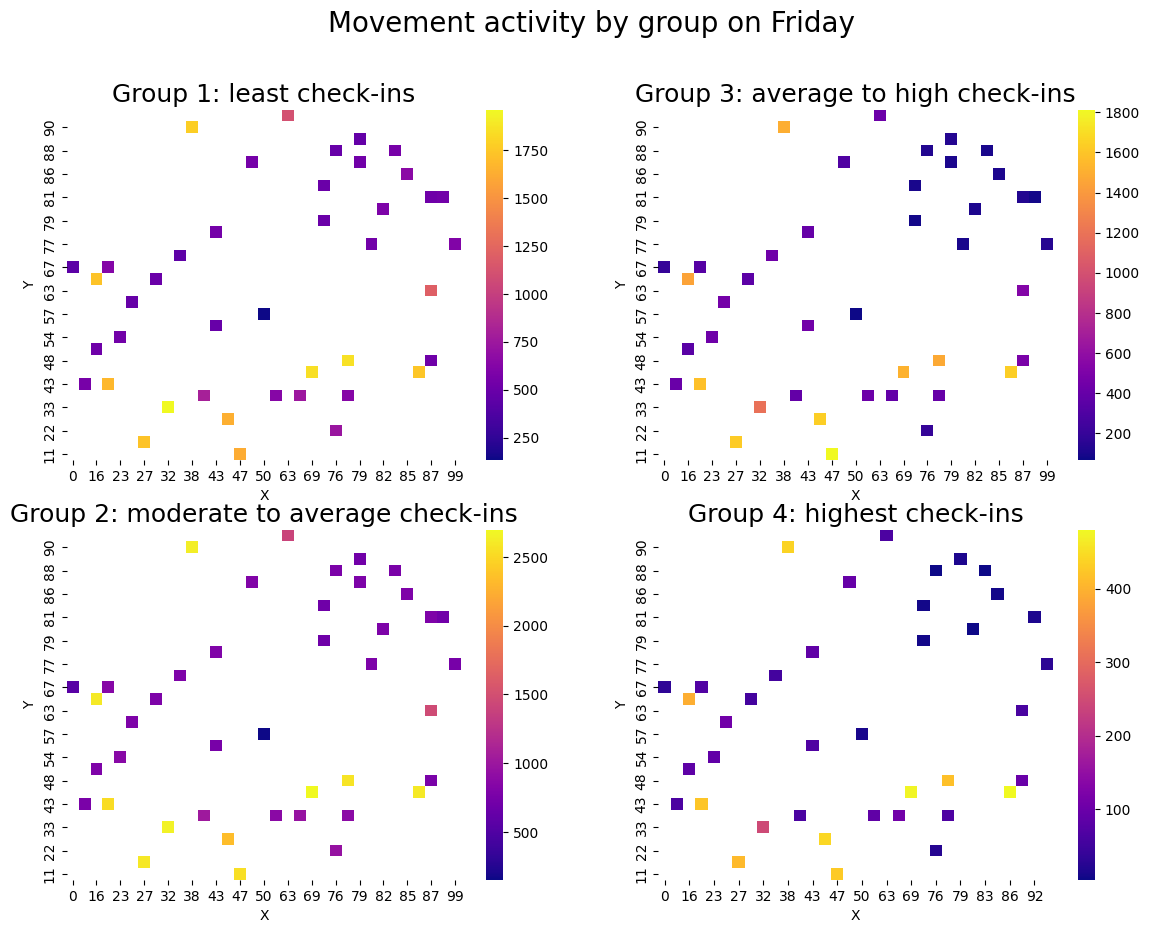

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14,10),sharex=False,sharey=False)
plt.suptitle('Movement activity by group on Friday',fontsize=20)

#pivot the dataframe to greate a [X x Y] matrix
sns.heatmap(popular_location_lower_fri.pivot("Y","X","count"),ax=axes[0,0],annot=False,cmap="plasma")
axes[0,0].invert_yaxis()
axes[0,0].set_title('Group 1: least check-ins',fontsize=18)
sns.heatmap(popular_location_mid_fri.pivot("Y","X","count"),ax=axes[1,0],annot=False,cmap="plasma")
axes[1,0].invert_yaxis()
axes[1,0].set_title('Group 2: moderate to average check-ins',fontsize=18)
sns.heatmap(popular_location_high_fri.pivot("Y","X","count"),ax=axes[0,1],annot=False,cmap="plasma")
axes[0,1].invert_yaxis()
axes[0,1].set_title('Group 3: average to high check-ins',fontsize=18)
sns.heatmap(popular_location_max_fri.pivot("Y","X","count"),ax=axes[1,1],annot=False,cmap="plasma")
axes[1,1].invert_yaxis()
axes[1,1].set_title('Group 4: highest check-ins',fontsize=18)
plt.show()

This heatmap analysis allows us to see what preferences are, based on what groups do on Friday. Overall, rides in Coaster Alley and thrill rides are the most popular rides on Friday. Check-ins are also common across all groups at at food outlets and bathrooms.

Groups which check into attractions the most seem to prefer Coaster Land, as seen by higher heatmap signatures where Coaster Land is located. This may indicate that those who go on the most rides prefer thrill rides. At approximately (87,44) are either rides for all or thrill rides. Groups which check-in moderate amounts or high amounts consistently check-in here. Groups which check onto rides the least appear to spend more time in cafes, shops, or the beer garden. Where rides appear they are generally rides for everyone, potentially suggesting this group consists of families. This would correlate with fewer check-ins; children are not assigned app ids. Group 2 and 3, representing groups checking in around the average amount, are the largest groups; but as discussed, this may be an artefact of children not having app ids.

We will repeat this analysis for the rest of the weekend to determine if we see other patterns.

### Movement on Saturday

In [ ]:
#full lower group - get user ids and original matching data
full_lower_group_sat = pd.merge(df_checkins_sat, lower_group_sat, on='id',how='inner')
full_lower_group_sat = full_lower_group_sat.drop(columns='count')
full_lower_group_sat.head()

,Timestamp,id,type,X,Y
0,2014-06-07 08:00:08,1102394,check-in,99,77
1,2014-06-07 08:02:58,1102394,check-in,83,88
2,2014-06-07 08:06:16,1102394,check-in,83,88
3,2014-06-07 09:48:07,1102394,check-in,76,22
4,2014-06-07 11:07:16,1102394,check-in,26,59


In [ ]:
#mid group
full_mid_group_sat = pd.merge(df_checkins_sat, mid_group_sat, on='id',how='inner')
full_mid_group_sat = full_mid_group_sat.drop(columns='count')

full_high_group_sat = pd.merge(df_checkins_sat, higher_group_sat, on='id',how='inner')
full_high_group_sat = full_high_group_sat.drop(columns='count')

full_max_group_sat = pd.merge(df_checkins_sat, max_group_sat, on='id',how='inner')
full_max_group_sat = full_max_group_sat.drop(columns='count')

In [ ]:
location_count_lower_sat = full_lower_group_sat.groupby(['X','Y']).size().reset_index(name='count')
popular_location_lower_sat = location_count_lower_sat.sort_values(by=['count'],ascending=False)

location_count_mid_sat = full_mid_group_sat.groupby(['X','Y']).size().reset_index(name='count')
popular_location_mid_sat = location_count_mid_sat.sort_values(by=['count'],ascending=False)

location_count_high_sat = full_high_group_sat.groupby(['X','Y']).size().reset_index(name='count')
popular_location_high_sat = location_count_high_sat.sort_values(by=['count'],ascending=False)

location_count_max_sat = full_max_group_sat.groupby(['X','Y']).size().reset_index(name='count')
popular_location_max_sat = location_count_max_sat.sort_values(by=['count'],ascending=False)

<ipython-input-76-a77098cc95ef>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_lower_sat.pivot("Y","X","count"),ax=axes[0,0],annot=False,cmap="plasma")
<ipython-input-76-a77098cc95ef>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_mid_sat.pivot("Y","X","count"),ax=axes[1,0],annot=False,cmap="plasma")
<ipython-input-76-a77098cc95ef>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_high_sat.pivot("Y","X","count"),ax=axes[0,1],annot=False,cmap="plasma")
<ipython-input-76-a77098cc95ef>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_max_sat.pivot("Y","X","count"),ax=axes[1,1],annot=False,cmap="plasma")


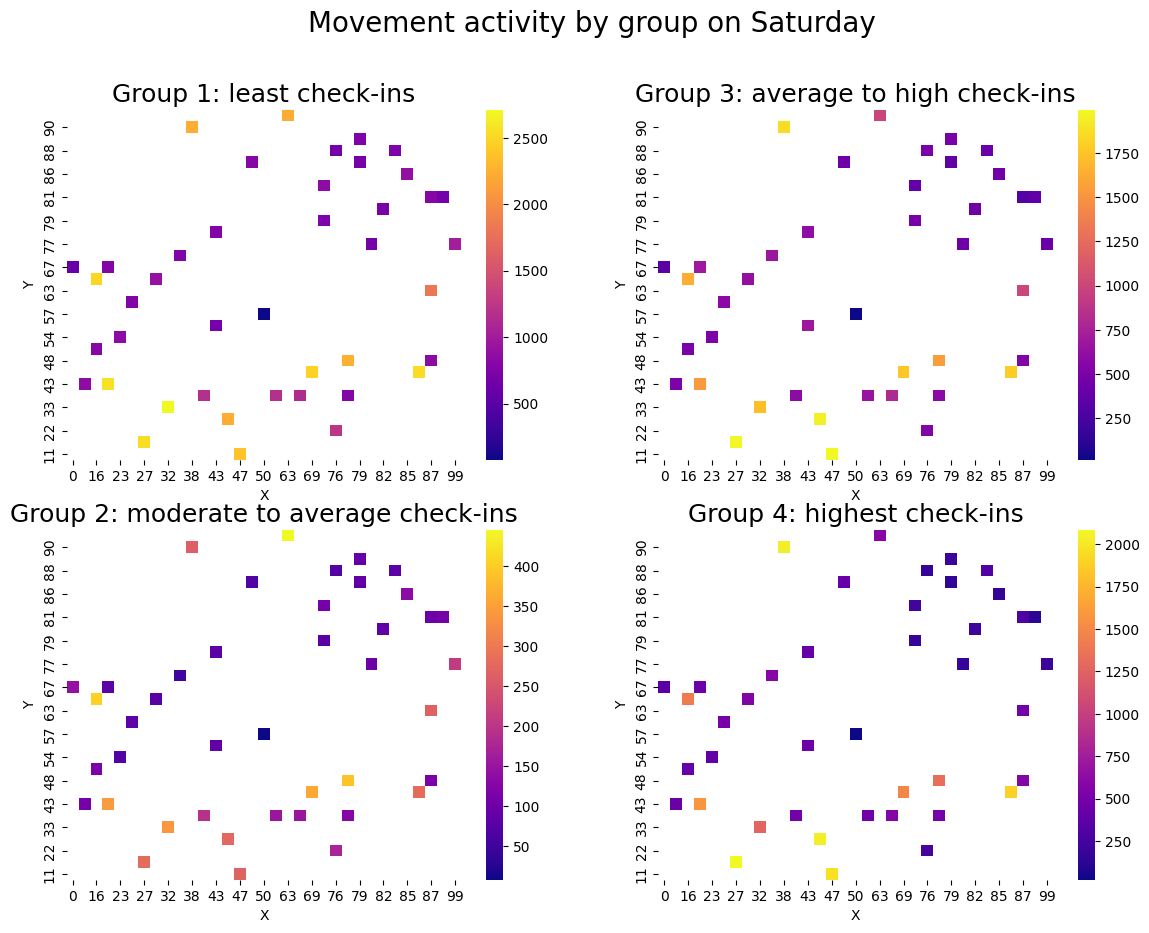

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14,10),sharex=False,sharey=False)
plt.suptitle('Movement activity by group on Saturday',fontsize=20)

#pivot the dataframe to greate a [X x Y] matrix
sns.heatmap(popular_location_lower_sat.pivot("Y","X","count"),ax=axes[0,0],annot=False,cmap="plasma")
axes[0,0].invert_yaxis()
axes[0,0].set_title('Group 1: least check-ins',fontsize=18)
sns.heatmap(popular_location_mid_sat.pivot("Y","X","count"),ax=axes[1,0],annot=False,cmap="plasma")
axes[1,0].invert_yaxis()
axes[1,0].set_title('Group 2: moderate to average check-ins',fontsize=18)
sns.heatmap(popular_location_high_sat.pivot("Y","X","count"),ax=axes[0,1],annot=False,cmap="plasma")
axes[0,1].invert_yaxis()
axes[0,1].set_title('Group 3: average to high check-ins',fontsize=18)
sns.heatmap(popular_location_max_sat.pivot("Y","X","count"),ax=axes[1,1],annot=False,cmap="plasma")
axes[1,1].invert_yaxis()
axes[1,1].set_title('Group 4: highest check-ins',fontsize=18)
plt.show()

The heatmap suggests similar patterns to Friday, with a higher frequency likely reflecting the higher number of people attending the park on Saturday with respect to Friday.

### Movement on Sunday

In [ ]:
#full lower group - get user ids and original matching data
full_lower_group_sun = pd.merge(df_checkins_sun, lower_group_sun, on='id',how='inner')
full_lower_group_sun = full_lower_group_sun.drop(columns='count')
full_lower_group_sun.head()

,Timestamp,id,type,X,Y
0,2014-06-08 08:00:14,100951,check-in,99,77
1,2014-06-08 08:03:57,100951,check-in,82,80
2,2014-06-08 09:05:43,100951,check-in,45,24
3,2014-06-08 10:39:42,100951,check-in,73,79
4,2014-06-08 11:05:42,100951,check-in,27,15


In [ ]:
#mid group
full_mid_group_sun = pd.merge(df_checkins_sun, mid_group_sun, on='id',how='inner')
full_mid_group_sun = full_mid_group_sun.drop(columns='count')
#higher
full_high_group_sun = pd.merge(df_checkins_sun, higher_group_sun, on='id',how='inner')
full_high_group_sun = full_high_group_sun.drop(columns='count')
#max
full_max_group_sun = pd.merge(df_checkins_sun, max_group_sun, on='id',how='inner')
full_max_group_sun = full_max_group_sun.drop(columns='count')

In [ ]:
location_count_lower_sun = full_lower_group_sun.groupby(['X','Y']).size().reset_index(name='count')
popular_location_lower_sun = location_count_lower_sun.sort_values(by=['count'],ascending=False)

location_count_mid_sun = full_mid_group_sun.groupby(['X','Y']).size().reset_index(name='count')
popular_location_mid_sun = location_count_mid_sun.sort_values(by=['count'],ascending=False)

location_count_high_sun = full_high_group_sun.groupby(['X','Y']).size().reset_index(name='count')
popular_location_high_sun = location_count_high_sun.sort_values(by=['count'],ascending=False)

location_count_max_sun = full_max_group_sun.groupby(['X','Y']).size().reset_index(name='count')
popular_location_max_sun = location_count_max_sun.sort_values(by=['count'],ascending=False)

<ipython-input-80-8c3121ce34e9>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_lower_sun.pivot("Y","X","count"),ax=axes[0,0],annot=False,cmap="plasma")
<ipython-input-80-8c3121ce34e9>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_mid_sun.pivot("Y","X","count"),ax=axes[1,0],annot=False,cmap="plasma")
<ipython-input-80-8c3121ce34e9>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_high_sun.pivot("Y","X","count"),ax=axes[0,1],annot=False,cmap="plasma")
<ipython-input-80-8c3121ce34e9>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(popular_location_max_sun.pivot("Y","X","count"),ax=axes[1,1],annot=False,cmap="plasma")


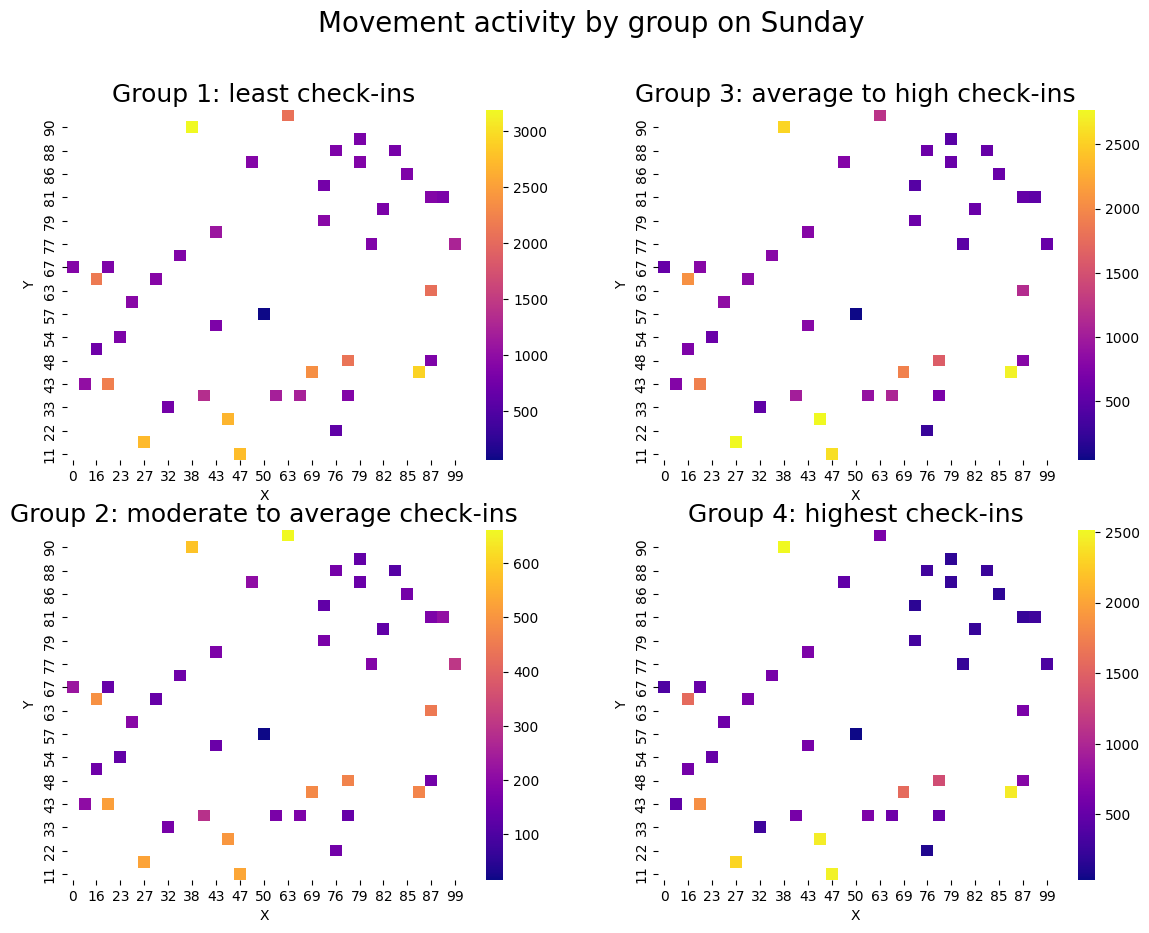

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14,10),sharex=False,sharey=False)
plt.suptitle('Movement activity by group on Sunday',fontsize=20)

#pivot the dataframe to greate a [X x Y] matrix
sns.heatmap(popular_location_lower_sun.pivot("Y","X","count"),ax=axes[0,0],annot=False,cmap="plasma")
axes[0,0].invert_yaxis()
axes[0,0].set_title('Group 1: least check-ins',fontsize=18)
sns.heatmap(popular_location_mid_sun.pivot("Y","X","count"),ax=axes[1,0],annot=False,cmap="plasma")
axes[1,0].invert_yaxis()
axes[1,0].set_title('Group 2: moderate to average check-ins',fontsize=18)
sns.heatmap(popular_location_high_sun.pivot("Y","X","count"),ax=axes[0,1],annot=False,cmap="plasma")
axes[0,1].invert_yaxis()
axes[0,1].set_title('Group 3: average to high check-ins',fontsize=18)
sns.heatmap(popular_location_max_sun.pivot("Y","X","count"),ax=axes[1,1],annot=False,cmap="plasma")
axes[1,1].invert_yaxis()
axes[1,1].set_title('Group 4: highest check-ins',fontsize=18)
plt.show()

### Movement analysis: summary

Looking at our heatmap analysis for all groups across all days we can build a picture of the park's activity:

Group 1 checks into rides the least amount. There is also more correlation between the activities for this group and Kiddie Land, general check-ins (such as food and bathrooms), and rides for all. This group does check into thrill rides though less frequently than some other groups, and thrill rides are popular among all groups. Group 1 has overall fewer check-ins and overall lower frequency; however, we can hypothesise that the presence of rides for all indicates families with children. Children are not assigned app ids, therefore the group will appear smaller.

Group 2 and 3 visit the most attractions, and as before thrill rides are popular. This would correlate with this group being either lone adults and/or teenagers, this group has lower check-ins per user. The lower correlation with Kiddie Land would be concorrent with this hypothesis.

Group 4 checks in the most and like groups 2 and 3 checks-in frequently to thrill rides. This group is also associated the most with beer gardens. This may imply this group is by proportion, adults.

# Summary and further work

Exploratory data analysis indicates that Saturday and Sunday are the busiest days for the park. Heatmaps suggest higher counts of check-ins overall but with lower intensity, suggesting more people check-in but less often. Group 1, potentially the group with small children, have more frequent check-ins on Friday. Groups 2, 3, and 4 have higher frequencies over Saturday and Sunday. This is consistent with adults and teenagers, who are more likely to only be free to go during the weekend. Parents/Guardians will likely be able to take children during the week. No causal link has been established; assigning children app ids to go with their parents may help understand this further.

Sunday had some null data corresponding to one entry. The park may wish to look into this. Potentially:

1) Some data can be entered in an incorrect format; 2) An individual remained in the park overnight